# Ensemle Learning

## Bagging: Random Forests

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [7]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

In [8]:
list(estimator_range)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

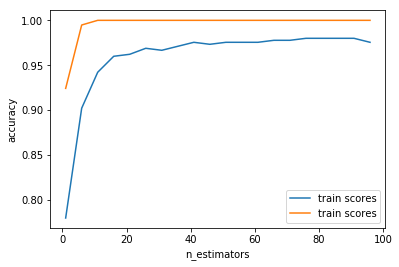

In [9]:
import matplotlib.pyplot as plt
plt.plot(estimator_range, test_scores, label="train scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

## Compare Ensemble Learning Methods 

In [22]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Step1: Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a Decision Tree model as comparison
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print('DT accuracy: ',accuracy_score(y_test, y_pred))

    
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf2 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print('RF accuracy: ',accuracy_score(y_test, y_pred))

    
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf3 = AdaBoostClassifier(n_estimators=100)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print('AdaBoost accuracy: ',accuracy_score(y_test, y_pred))


DT accuracy:  0.7525
RF accuracy:  0.7965
AdaBoost accuracy:  0.833
